In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load salary data
df = pd.read_csv('../Data/salary_cleaned.csv')
df.head()

,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,...,month,year_month,timestamp_3mos,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,state,employment_rate,employment_rate_3mos
0,0,2018-06-03 13:58:20,Yahoo,IC2,Software Engineer,160.5,"Sunnyvale, CA",0.58,0.58,Full Stack,...,6,2018-06,2018-03-03 13:58:20,2018-03,CA,0.029,0.024,California,0.957660,0.956797
1,2,2018-06-04 20:28:22,Facebook,E3,Software Engineer,165.0,"Seattle, WA",1.00,1.00,Full Stack,...,6,2018-06,2018-03-04 20:28:22,2018-03,WA,0.029,0.024,Washington,0.955998,0.954978
2,3,2018-06-05 00:56:33,VmWare,Senior MTS,Software Engineer,218.0,"Palo Alto, CA",8.00,1.00,Distributed Systems (Back-End),...,6,2018-06,2018-03-05 00:56:33,2018-03,CA,0.029,0.024,California,0.957660,0.956797
3,4,2018-06-05 01:19:05,Uber,L4,Software Engineer,240.0,"San Francisco, CA",3.00,0.00,Web Development (Front-End),...,6,2018-06,2018-03-05 01:19:05,2018-03,CA,0.029,0.024,California,0.957660,0.956797
4,5,2018-06-05 07:13:17,Capital One,Master Software Engineer,Software Engineer,196.0,"New York, NY",8.00,2.00,iOS,...,6,2018-06,2018-03-05 07:13:17,2018-03,NY,0.029,0.024,New York,0.959053,0.955962


In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
print(df.shape)
df.info()

(24496, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24496 entries, 0 to 24495
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                24496 non-null  object 
 1   company                  24496 non-null  object 
 2   level                    24496 non-null  object 
 3   title                    24496 non-null  object 
 4   totalyearlycompensation  24496 non-null  float64
 5   location                 24496 non-null  object 
 6   yearsofexperience        24496 non-null  float64
 7   yearsatcompany           24496 non-null  float64
 8   tag                      24496 non-null  object 
 9   year                     24496 non-null  int64  
 10  month                    24496 non-null  int64  
 11  year_month               24496 non-null  object 
 12  timestamp_3mos           24496 non-null  object 
 13  year_month_3mos          24496 non-null  object 
 14  state_shor

In [5]:
df.isnull().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
year                       0
month                      0
year_month                 0
timestamp_3mos             0
year_month_3mos            0
state_short                0
inflation_rate             0
inflation_rate_3mos        0
state                      0
employment_rate            0
employment_rate_3mos       0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
totalyearlycompensation,24496.0,236.763961,130.793829,15.000000,158.000000,205.000000,280.000000,4950.000000
yearsofexperience,24496.0,7.158433,5.982022,0.000000,3.000000,6.000000,10.000000,41.000000
yearsatcompany,24496.0,2.700132,3.290854,0.000000,0.000000,2.000000,4.000000,34.000000
year,24496.0,2019.508124,0.652234,2018.000000,2019.000000,2020.000000,2020.000000,2020.000000
month,24496.0,6.589606,3.070840,1.000000,4.000000,7.000000,9.000000,12.000000
inflation_rate,24496.0,0.015411,0.006829,0.001000,0.013000,0.016000,0.021000,0.030000
inflation_rate_3mos,24496.0,0.015649,0.008444,0.001000,0.006000,0.018000,0.023000,0.030000
employment_rate,24496.0,0.925572,0.044118,0.759883,0.889769,0.955321,0.960693,0.976102
employment_rate_3mos,24496.0,0.930437,0.048737,0.747221,0.899878,0.957692,0.961051,0.976363


In [7]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'year',
       'month', 'year_month', 'timestamp_3mos', 'year_month_3mos',
       'state_short', 'inflation_rate', 'inflation_rate_3mos', 'state',
       'employment_rate', 'employment_rate_3mos'],
      dtype='object')

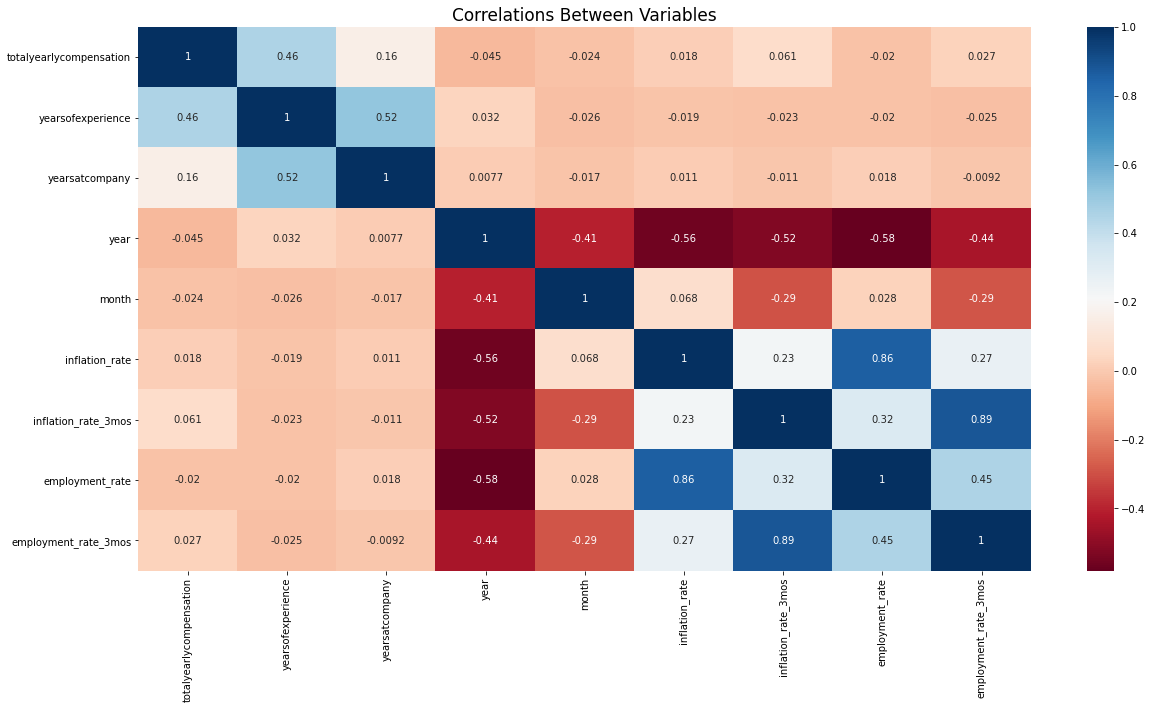

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.title("Correlations Between Variables", size=17)
plt.show()

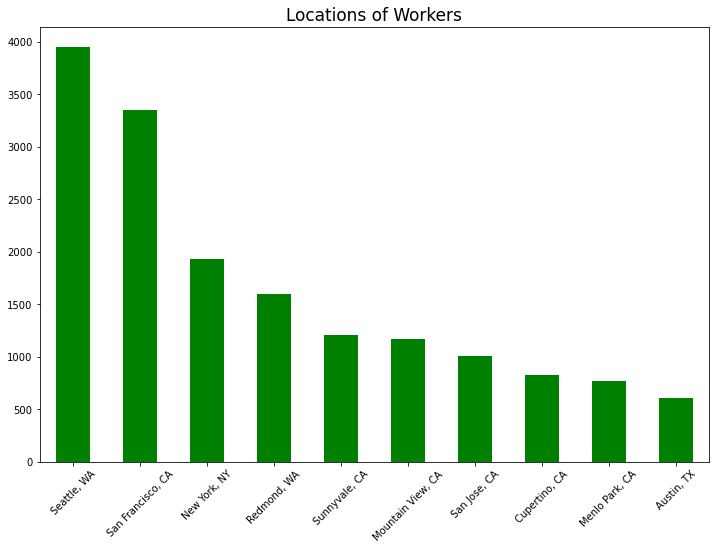

In [9]:
# EDA
plt.figure(figsize=(12,8))
df["location"].value_counts().iloc[:10].plot(kind="bar", color="green")
plt.title("Locations of Workers", size=17)
plt.xticks(rotation=45)
plt.show()

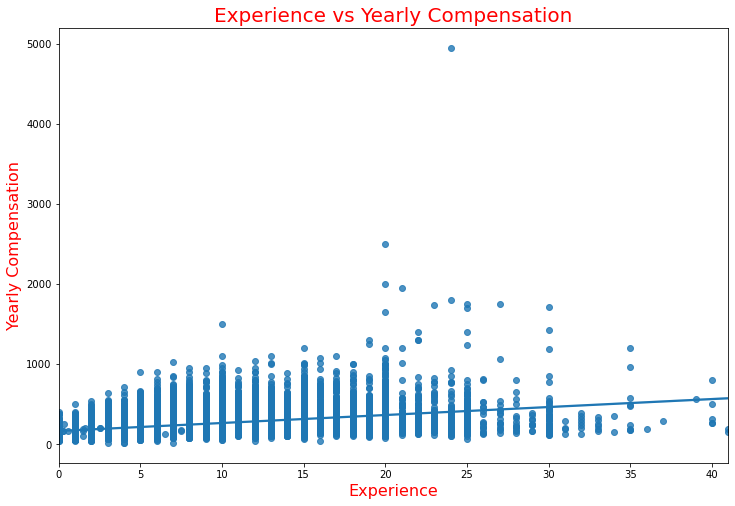

In [10]:
plt.figure(figsize=(12,8))
sns.regplot(x=df["yearsofexperience"], y=df["totalyearlycompensation"])
plt.title("Experience vs Yearly Compensation", size=20, color = 'red')
plt.xlabel("Experience", size=16, color = 'red')
plt.ylabel("Yearly Compensation", size=16, color = 'red')
plt.show()

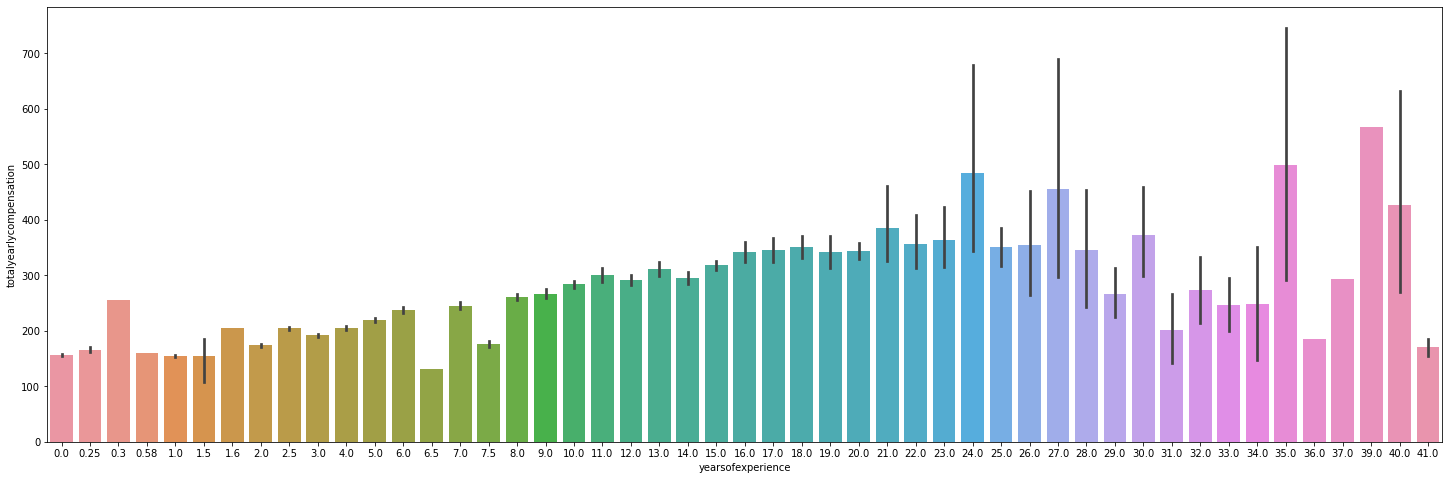

In [11]:
plt.figure(figsize=(25,8))
sns.barplot(x=df['yearsofexperience'], y = df['totalyearlycompensation']);

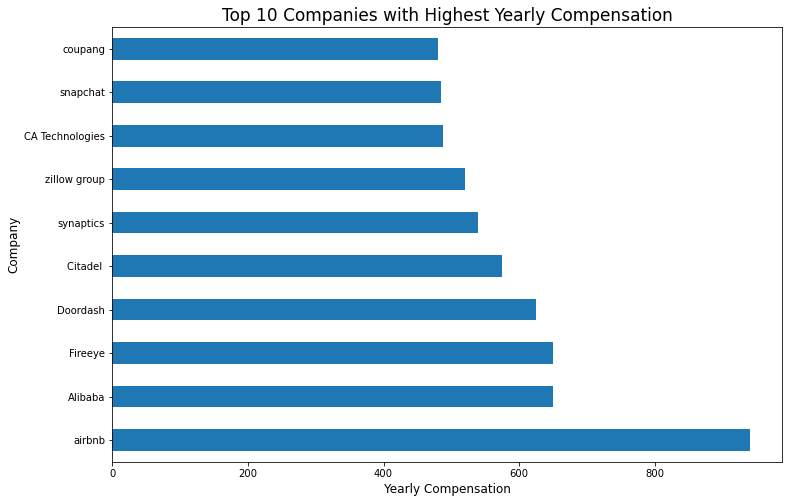

In [12]:
grouped_df_by_company = df.groupby(["company"]).mean()

plt.figure(figsize=(12,8))
grouped_df_by_company.sort_values(by="totalyearlycompensation", ascending=False).head(10)["totalyearlycompensation"].plot(kind="barh")
plt.title("Top 10 Companies with Highest Yearly Compensation", size=17)
plt.xlabel("Yearly Compensation", size=12)
plt.ylabel("Company", size=12)
plt.show()

In [13]:
num_cols = df.select_dtypes(["float64","int64"])
cat_cols = df.select_dtypes(["object"])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_df = scaler.fit_transform(df[num_cols.columns])
standardized_df = pd.DataFrame(standardized_df, columns=num_cols.columns)

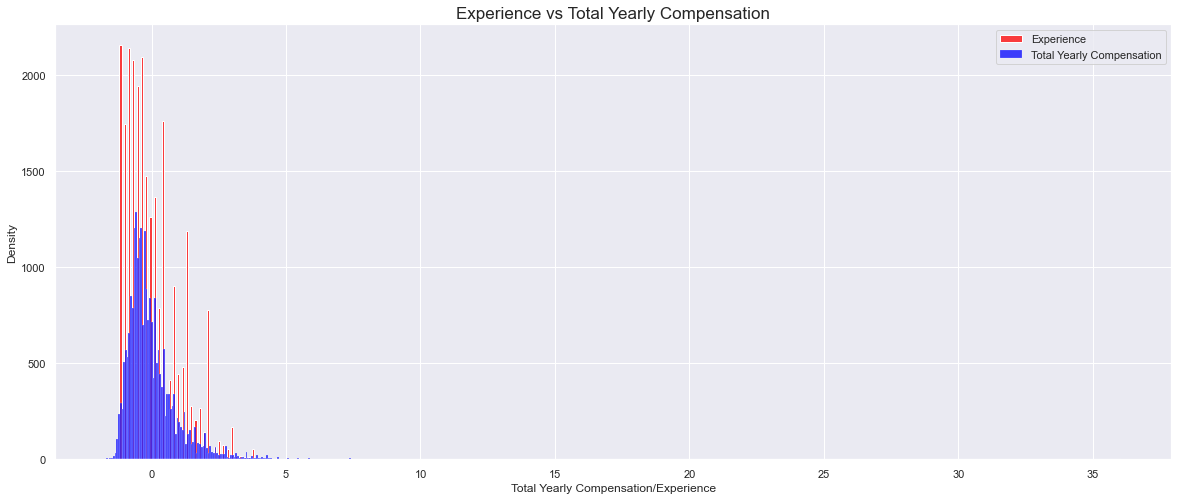

In [18]:
# scaling
sns.set_theme()

plt.figure(figsize=(20,8))
sns.histplot(standardized_df["yearsofexperience"], color="red", label="Experience")
sns.histplot(standardized_df["totalyearlycompensation"], color="blue", label="Total Yearly Compensation")
plt.title("Experience vs Total Yearly Compensation", size=17)
plt.xlabel("Total Yearly Compensation/Experience", size=12)
plt.ylabel("Density", size=12)
plt.legend()
plt.show()

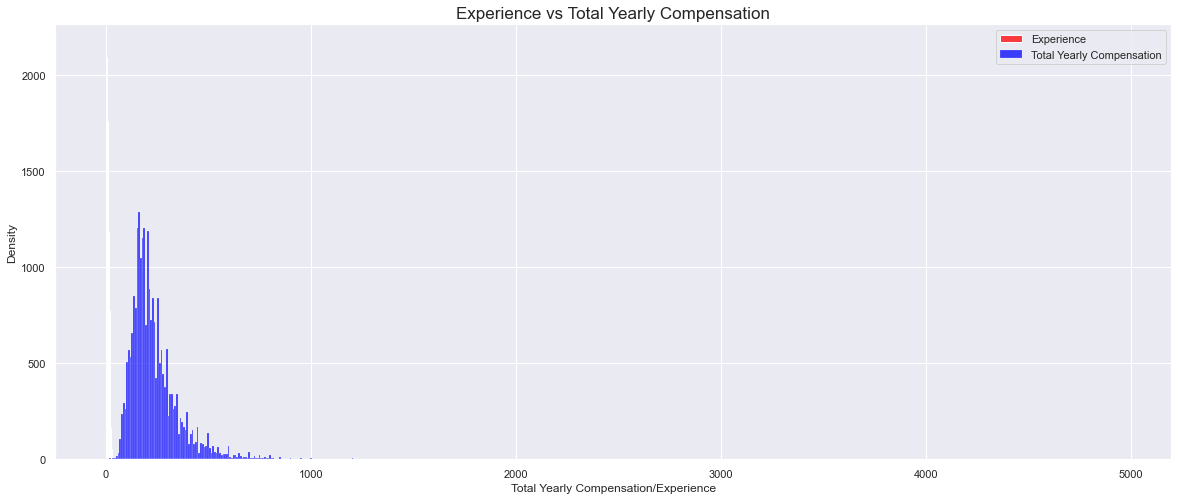

In [16]:
# without scaling
sns.set_theme()

plt.figure(figsize=(20,8))
sns.histplot(df["yearsofexperience"], color="red", label="Experience")
sns.histplot(df["totalyearlycompensation"], color="blue", label="Total Yearly Compensation")
plt.title("Experience vs Total Yearly Compensation", size=17)
plt.xlabel("Total Yearly Compensation/Experience", size=12)
plt.ylabel("Density", size=12)
plt.legend()
plt.show()

In [ ]:
# modeling

